In [57]:
#Pokemon type advantage analysis by notDavid
#This is the code for the pokemon type advantage network. Please note that while I do a lot of programming, 
#I in no way consider myself to be a great programmer. I have tried to make this comprehensible but I'm sure its not great


#CALL THE NECCESSARY MODULES
#most of these should come by default with python3... except maybe not networkx. It should be easy to install with a single pip command.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import collections

In [58]:
#DEFINE THE ADVANTAGE LIST
#each element (18 in total) 
typelabels = {0:"bug", 1:"dark", 2:"dragon",3:"electric",4:"fairy",5:"fighting",6:"fire",7:"flying",8:"ghost",9:"grass",10:"ground",11:"ice",12:"normal",13:"poison", 14:"psychic",15:"rock",16:"steel",17:"water"}

# key is type: val is list of types that the key is strong against
effectiveAgainstDict = {
    0: [1,9,14], 1: [8,14], 2: [2], 3: [7,17], 4: [1,2,5], 
    5: [1,11,12,15,16], 6: [0,9,11,16], 7: [0,9,5], 8: [8,14], 9: [10,15,17],
    10: [3,6,13,15,16], 11: [2,7,9,10], 12: [], 13: [4,9], 14: [5, 13],
    15: [0,6,7,11], 16: [4,11,15], 17: [6,10,15]
    }

#The first element of each list is the node, followed by the type(s) it is advantageous against
# advantageList = [(0,1,9,14),(1,8,14),(2,2), (3,7,17),(4,1,2,5), (5,1,11,12,15,16), (6,0,9,11,16), (7,0,9,5), (8,8,14),(9,10,15,17),(10,3,6,13,15,16),(11,2,7,9,10),(12,float("nan")),(13,4,9),(14,5,13),(15,0,6,7,11),(16,4,11,15),(17,6,10,15)]

#Now make a list of tuples [I,J] that say node I is linked to node J
edges = []
for atkType, lstTypes in effectiveAgainstDict.items():
    for type in lstTypes:
        edges.append((atkType, type))

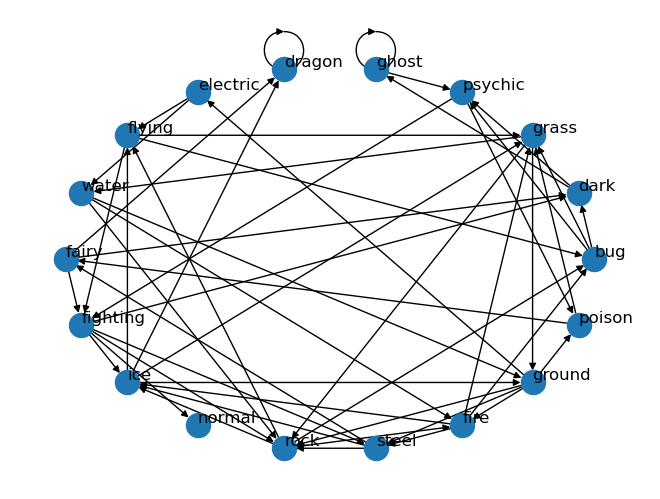

In [59]:
##pokemon graph
#Now we want to draw the network (also called graph)
Nnodes = len(typelabels)
G = nx.DiGraph()
# G.add_nodes_from(range(Nnodes))
G.add_edges_from(edges)

G = nx.relabel_nodes(G, typelabels)

nodepos = nx.circular_layout(G)
nx.draw(G, pos=nodepos, with_labels = True, horizontalalignment='left', verticalalignment = 'bottom')
plt.show()

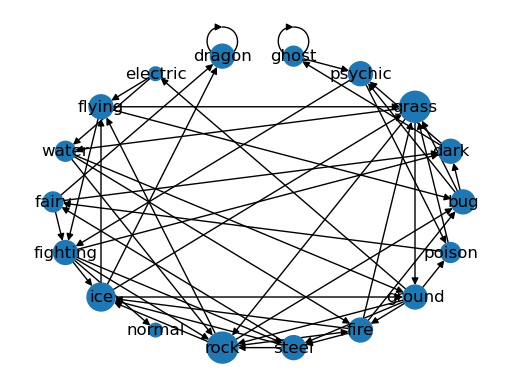

In [60]:
## This will plot the network using a radius that is proportional the elements IN degree
#we can think of this as IN degree centrality

plt.subplots(1)
in_degree = dict(G.in_degree)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*100)^4 for v in in_degree.values()])

plt.show()

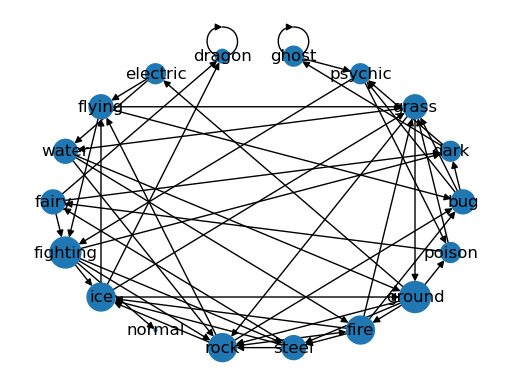

In [61]:
## This will plot the network using a radius that is proportional the elements OUT degree
#we can think of this as OUT degree centrality


plt.subplots(1)
out_degree = dict(G.out_degree)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*100)^4 for v in out_degree.values()]) #directed links mean advantageous against

plt.show()

In [62]:
degreesList = [val for (node, val) in G.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE      : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:10}: {1:6}, {2:3}, {3}".format(list(typelabels.values())[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE      : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug       :      6,   3, 3
dark      :      5,   2, 3
dragon    :      8,   3, 5
electric  :      5,   2, 3
fairy     :      4,   2, 2
fighting  :      4,   1, 3
fire      :      3,   2, 1
flying    :      6,   3, 3
ghost     :      5,   3, 2
grass     :      5,   3, 2
ground    :      8,   5, 3
ice       :      8,   4, 4
normal    :      1,   0, 1
poison    :      9,   4, 5
psychic   :      6,   3, 3
rock      :      7,   4, 3
steel     :      8,   5, 3
water     :      4,   2, 2


In [63]:
print("Out degrees:")
#print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
[print(tupe) for tupe in sorted(G.out_degree, key=lambda x: x[1], reverse=True)]
print()

Out degrees:
('fighting', 5)
('ground', 5)
('ice', 4)
('rock', 4)
('fire', 4)
('bug', 3)
('grass', 3)
('flying', 3)
('water', 3)
('fairy', 3)
('steel', 3)
('dark', 2)
('psychic', 2)
('ghost', 2)
('electric', 2)
('poison', 2)
('dragon', 1)
('normal', 0)



In [64]:
print("In degrees:")
#print the in degrees in descending order. Indegrees are weaknesses, so the sooner in the list the more weakenesses that element has.
[print(tupe) for tupe in sorted(G.in_degree, key=lambda x: x[1], reverse=True)]
print()

In degrees:
('grass', 5)
('rock', 5)
('ice', 4)
('bug', 3)
('dark', 3)
('psychic', 3)
('dragon', 3)
('flying', 3)
('fighting', 3)
('steel', 3)
('fire', 3)
('ground', 3)
('ghost', 2)
('water', 2)
('fairy', 2)
('poison', 2)
('electric', 1)
('normal', 1)



In [65]:
#get the average degrees
print(np.mean(degreesList))
print(np.mean(out_degreesList))
print(np.mean(in_degreesList))

5.666666666666667
2.8333333333333335
2.8333333333333335


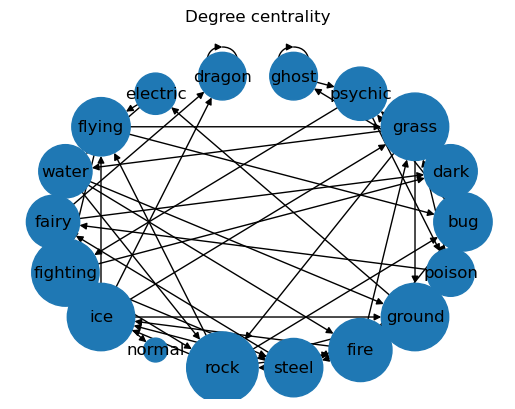

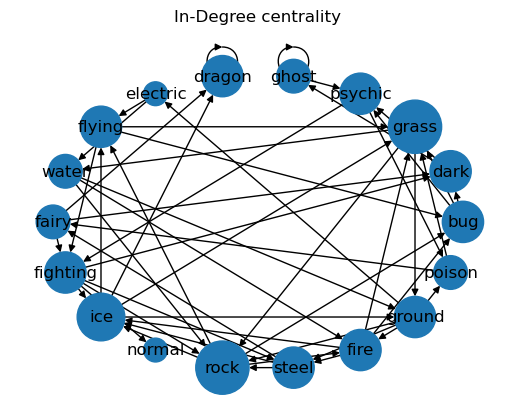

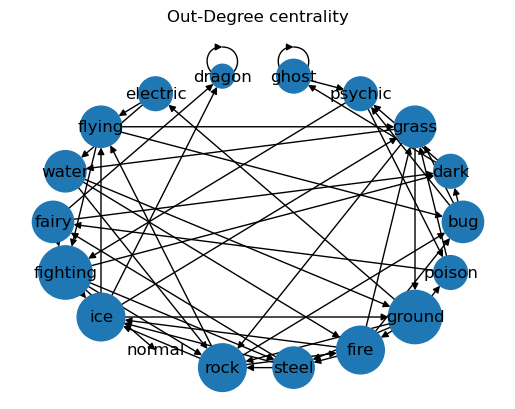

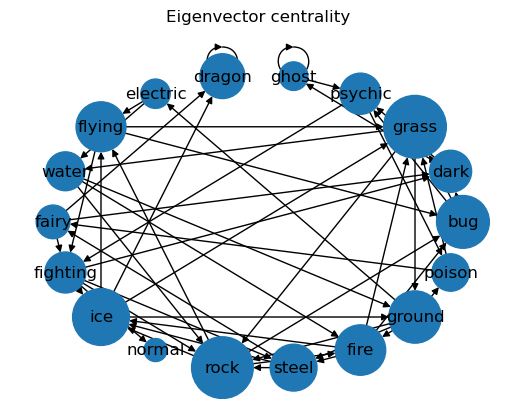

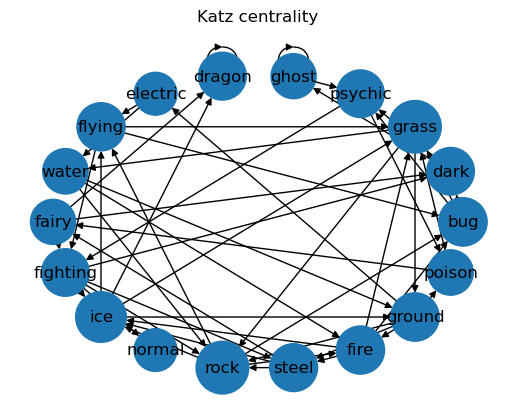

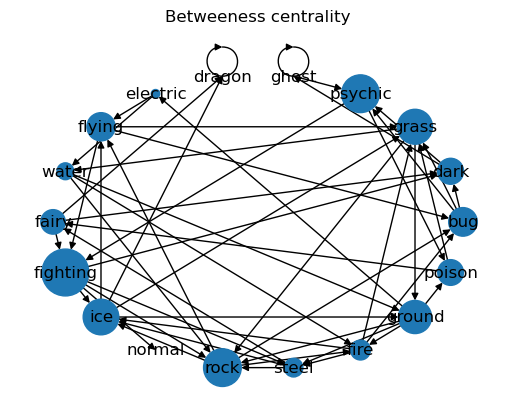

In [66]:
#Centrality Analysis
#Now we'll use different centrality measures and plot the result as the radius of the element in the network
#I can't go into what these are if you dont know them here, but there are plenty of websites that explain these in plain language.

#Degree centrality
plt.subplots(1)
plt.title("Degree centrality")
nx.draw(G, pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.degree_centrality(G).values()])

#In-Degree centrality
plt.subplots(1)
plt.title("In-Degree centrality")
nx.draw(G, pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.in_degree_centrality(G).values()])

#out-Degree centrality
plt.subplots(1)
plt.title("Out-Degree centrality")
nx.draw(G, pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.out_degree_centrality(G).values()])

#eigenvector centrality
plt.subplots(1)
plt.title("Eigenvector centrality")
nx.draw(G, pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.eigenvector_centrality(G).values()])

#Katz centrality
plt.subplots(1)
plt.title("Katz centrality")
nx.draw(G, pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.katz_centrality(G).values()])

#betweeness centrality
plt.subplots(1)
plt.title("Betweeness centrality")
nx.draw(G, pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.betweenness_centrality(G).values()])

plt.show()


In [67]:
#Find all triangles (also called cyclic triads), like Water>Fire>Grass>Water....

G2 = G
#triad_type doesn't work if self loops are present, but we don't care about those anyway in this analysis so get rid of them
G2.remove_edges_from(nx.selfloop_edges(G2)) 

#don't worry about this stuff
count = 1;
for i in nx.all_triads(G2):
    if len(i.edges) == 3:
        #this next line is annoying. Its from a page 15/32 of a pdf linked in the documentation for triad_type.
        #pdf is here: https://web.archive.org/web/20170830032057/http://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf
        if nx.triad_type(i) == '030C':  
            print(i.nodes)
            count += 1

            
#print out the triangles            
print(count)            


['bug', 'rock', 'grass']
['fighting', 'psychic', 'dark']
['grass', 'rock', 'flying']
['grass', 'fire', 'water']
['grass', 'rock', 'ice']
['grass', 'fire', 'rock']
['grass', 'fire', 'ground']
['grass', 'poison', 'ground']
['ground', 'electric', 'water']
['fighting', 'flying', 'ice']
['fighting', 'rock', 'flying']
['fighting', 'steel', 'fairy']
['rock', 'ice', 'ground']
['steel', 'ice', 'ground']
['fire', 'ice', 'ground']
['steel', 'fire', 'rock']
17


In [68]:
#This is to test for any 2-cycles. 0 means no 2-cycles in the network.
nx.reciprocity(G)

0.0

In [69]:
# Begin addition for dual-types. Will define the graph as:
#  a node is a pair of types, including two of the same type, e.g. "Water-Water"
#   this means there will be n(n+1)/2 or 18*19/2 nodes = 171 (no double counting; order of types does not matter)
#  a directed edge between two nodes exists from a source towards a target if:
#   the target has either of its two types as weak to either of the two types of the source
#   note, this is NOT the behavior in the games, as weaknesses and resitences "cancel out", that analysis to follow.


# first, convert type advantages to strings as debugging by index will quickly become untenable.
advantages_by_name = {typelabels[key]: list(map(lambda x: typelabels[x], val)) for key, val in effectiveAgainstDict.items()}
    
# for k, v in advantages_by_name.items():
#     print(k, v)

types = list(typelabels.values())
    
# Next, define list of all possible type pairs (as strings):
dual_type_nodes = []
# and a lookup table for types to nodes, to add edges in the next step
nodes_by_type = {}
for t in types:
    nodes_by_type[t] = set()
    
for i in range(len(types)):
    primary = types[i]
    for j in range(i, len(types)): # start from i to avoid pairing duplicates (order of typing does not matter)
        secondary = types[j]
        node_name = ""
        if primary == secondary:
            node_name = primary
        else:
            node_name = "{}-{}".format(primary, secondary)
        dual_type_nodes.append(node_name)
        nodes_by_type[primary].add(node_name)
        nodes_by_type[secondary].add(node_name)

# print(dual_type_nodes)
print("number of nodes: ", len(dual_type_nodes))


print()
# Next, define the edges:
dual_type_edges = set()
for source, targets in advantages_by_name.items():
    source_nodes = nodes_by_type[source]
    target_nodes = set()
    for t in targets:
        target_nodes.update(nodes_by_type[t])
    
    new_edges = []
    for s in source_nodes:
        for t in target_nodes:
            new_edges.append((s, t))
    dual_type_edges.update(new_edges)

# as you might expect, there are a lot of edges
# print(dual_type_edges)
print("number of edges: ", len(dual_type_edges))

number of nodes:  171

number of edges:  13512


In [70]:
# now, we won't try to render this graph (mostly because the below commented out sections look pretty rough)
#   but we will run the analysis:

G3 = nx.DiGraph()
G3.add_nodes_from(dual_type_nodes)
G3.add_edges_from(dual_type_edges)

degreesList = [val for (node, val) in G3.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G3.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G3.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:20}: {1:6}, {2:3}, {3:3}".format(dual_type_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE                : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                 :    102,  51,  51
bug-dark            :    159,  66,  93
bug-dragon          :    159,  66,  93
bug-electric        :    146,  80,  66
bug-fairy           :    160,  80,  80
bug-fighting        :    185, 105,  80
bug-fire            :    173,  93,  80
bug-flying          :    160,  80,  80
bug-ghost           :    146,  66,  80
bug-grass           :    186,  93,  93
bug-ground          :    209, 116,  93
bug-ice             :    173,  93,  80
bug-normal          :    117,  51,  66
bug-poison          :    146,  66,  80
bug-psychic         :    173,  80,  93
bug-rock            :    221, 105, 116
bug-steel           :    173,  93,  80
bug-water           :    173,  93,  80
dark                :     86,  35,  51
dark-dragon         :    131,  51,  80
dark-electric       :    132,  66,  66
dark-fairy          :    160,  80,  80
dark-fighting       :    185, 105,  80
dark-fire           :    186,  93,  9

In [71]:
# Will run and produce a... graph? it's impossible to interpret as far as I can tell, though

# nodepos = nx.circular_layout(G)
# nx.draw(G,pos=nodepos, with_labels = False,  horizontalalignment='left', verticalalignment = 'bottom') #directed links mean advantageous against

In [74]:
# Now, we improve the type interaction model, where we appropriately account for type resistance.
# following the model above for definitions.

disadvantageList = [['fire', 'fighting', 'poison', 'flying', 'ghost', 'steel', 'fairy'], 
    ['fighting', 'dark', 'fairy'], ['steel'], ['electric', 'grass', 'dragon'], ['fire', 'poison', 'steel'], 
    ['poison', 'flying', 'psychic', 'bug', 'fairy'], ['fire', 'water', 'rock', 'dragon'], 
    ['electric', 'rock', 'steel'], ['dark'], ['fire', 'grass', 'poison', 'flying', 'bug', 'dragon', 'steel'],
    ['grass', 'bug'], ['fire', 'water', 'ice', 'steel'], ['rock', 'steel'], 
    ['poison', 'ground', 'rock', 'ghost'], ['psychic', 'steel'], ['fighting', 'ground', 'steel'], 
    ['fire', 'water', 'electric', 'steel'], ['water', 'grass', 'dragon']]
immunityList = [[], [], ['fairy'], ['ground'], [], ['ghost'], [], [], ['normal'], [], ['flying'], [], ['ghost'], ['steel'], ['dark'], [], [], []]


In [75]:
disadvantages_by_name = {}
immunities_by_name = {}
for i in range(len(types)):
    t = types[i]
    disadvantages = disadvantageList[i]
    disadvantages_by_name[t] = disadvantages
    immunities = immunityList[i]
    immunities_by_name[t] = immunities
    
# for k, v in disadvantages_by_name.items():
#     print(k, v)
# print()
# for k, v in immunities_by_name.items():
#     print(k, v)

print()

# Next, define the edges by type advantage model:
#   if against one type is advantaged and another is disadvantaged, "cancel out" and do not be an edge
#   if against at least one type is advantaged, be an edge
#   if either type is immune, do not be an edge
canceling_out_dual_type_edges = set()
attack_type_to_super_effective_targets = {}
for source in types:
    source_nodes = nodes_by_type[source]
    advantage_targets = advantages_by_name[source]
    advantage_nodes = set()
    [advantage_nodes.update(nodes_by_type[t]) for t in advantage_targets]

    disadvantage_targets = disadvantages_by_name[source]
    disadvantage_nodes = set()
    [disadvantage_nodes.update(nodes_by_type[t]) for t in disadvantage_targets]
    
    immune_targets = immunities_by_name[source]
    immune_nodes = set()
    [immune_nodes.update(nodes_by_type[t]) for t in immune_targets]
    
    target_nodes = set()
    for target_node in advantage_nodes:
        if target_node in immune_nodes:
            continue
        if target_node in disadvantage_nodes:
            continue
        target_nodes.add(target_node)

    attack_type_to_super_effective_targets[source] = target_nodes

    new_edges = []
    for s in source_nodes:
        for t in target_nodes:
            new_edges.append((s, t))
    canceling_out_dual_type_edges.update(new_edges)

# one simple check we can do is that many of the edges from the previous version are removed here:
# print(canceling_out_dual_type_edges)
print("number of canceling-out edges: ", len(canceling_out_dual_type_edges))
print("number of non-canceling-out edges: ", len(dual_type_edges))


number of canceling-out edges:  10631
number of non-canceling-out edges:  13512


In [76]:
# this lets you see the dual types a particular attack, which are single-typed, is effective against:

for attack_type, targets in attack_type_to_super_effective_targets.items():
    print(attack_type, ":")
    print("    ", targets)
    print()

bug :
     {'dragon-grass', 'dark-rock', 'dark-normal', 'grass', 'dark', 'psychic-rock', 'dark-psychic', 'grass-ice', 'ice-psychic', 'psychic', 'dark-dragon', 'bug-dark', 'grass-ground', 'dark-ground', 'ground-psychic', 'grass-psychic', 'bug-grass', 'psychic-water', 'normal-psychic', 'dark-grass', 'grass-normal', 'grass-rock', 'dark-water', 'dark-ice', 'grass-water', 'bug-psychic', 'electric-grass', 'dark-electric', 'electric-psychic', 'dragon-psychic'}

dark :
     {'ghost-poison', 'psychic-rock', 'fire-psychic', 'ice-psychic', 'psychic', 'poison-psychic', 'ghost', 'ground-psychic', 'ghost-grass', 'grass-psychic', 'normal-psychic', 'psychic-water', 'dragon-ghost', 'ghost-ice', 'ghost-water', 'ghost-psychic', 'flying-psychic', 'ghost-steel', 'bug-psychic', 'electric-ghost', 'ghost-normal', 'ghost-ground', 'bug-ghost', 'psychic-steel', 'electric-psychic', 'fire-ghost', 'flying-ghost', 'dragon-psychic', 'ghost-rock'}

dragon :
     {'dragon-grass', 'dragon-water', 'dragon-flying', 'drago

In [77]:
# now we run the analysis again with the new model:

G4 = nx.DiGraph()
G4.add_nodes_from(dual_type_nodes)
G4.add_edges_from(canceling_out_dual_type_edges)

degreesList = [val for (node, val) in G4.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G4.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G4.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:20}: {1:6}, {2:3}, {3:3}".format(dual_type_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE                : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                 :     81,  30,  51
bug-dark            :    129,  49,  80
bug-dragon          :    123,  43,  80
bug-electric        :     90,  55,  35
bug-fairy           :    139,  59,  80
bug-fighting        :    134,  68,  66
bug-fire            :    119,  68,  51
bug-flying          :    141,  61,  80
bug-ghost           :    132,  52,  80
bug-grass           :    147,  54,  93
bug-ground          :    157,  91,  66
bug-ice             :    133,  67,  66
bug-normal          :     81,  30,  51
bug-poison          :    112,  46,  66
bug-psychic         :    152,  59,  93
bug-rock            :    129,  78,  51
bug-steel           :     81,  63,  18
bug-water           :    119,  68,  51
dark                :     80,  29,  51
dark-dragon         :    123,  43,  80
dark-electric       :    118,  52,  66
dark-fairy          :    120,  69,  51
dark-fighting       :    130,  79,  51
dark-fire           :    137,  71,  6

In [79]:
print("Out degrees:")
#print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
[print(tupe) for tupe in sorted(G4.out_degree, key=lambda x: x[1], reverse=True)]
print()

Out degrees:
('ground-ice', 109)
('flying-ground', 105)
('ground-rock', 104)
('fire-ground', 102)
('fairy-ground', 101)
('fighting-rock', 92)
('bug-ground', 91)
('fighting-ice', 91)
('ground-steel', 91)
('fairy-rock', 90)
('ice-rock', 90)
('fire-water', 89)
('electric-ground', 88)
('fighting-ground', 88)
('ground-poison', 88)
('fairy-fire', 86)
('fighting-flying', 86)
('fire-ice', 86)
('ghost-ground', 86)
('dark-ground', 84)
('fighting-fire', 83)
('fire-rock', 82)
('grass-ground', 82)
('grass-rock', 82)
('fighting-ghost', 81)
('ice-steel', 81)
('rock-water', 81)
('fairy-water', 80)
('flying-rock', 80)
('flying-water', 80)
('dark-fighting', 79)
('fire-grass', 79)
('ground-psychic', 79)
('ground-water', 79)
('ice-water', 79)
('psychic-rock', 79)
('bug-rock', 78)
('dragon-ground', 77)
('ghost-rock', 77)
('rock-steel', 77)
('fairy-fighting', 76)
('fighting-psychic', 76)
('dark-rock', 75)
('fighting-water', 75)
('fire-steel', 75)
('flying-steel', 75)
('electric-fire', 74)
('fighting-steel',

In [81]:
print("In degrees:")
#print the in degrees in descending order. Indegrees are weaknesses, so the sooner in the list the more weakenesses that element has.
[print(tupe) for tupe in sorted(G4.in_degree, key=lambda x: x[1])]
print()

In degrees:
('bug-steel', 18)
('dark-ghost', 18)
('dark-poison', 18)
('electric', 18)
('ghost-normal', 18)
('ground-water', 18)
('normal', 18)
('bug-electric', 35)
('dark-psychic', 35)
('dragon-steel', 35)
('dragon-water', 35)
('electric-fairy', 35)
('electric-flying', 35)
('electric-normal', 35)
('electric-poison', 35)
('electric-water', 35)
('fairy', 35)
('fairy-ghost', 35)
('fairy-normal', 35)
('fairy-steel', 35)
('fire-ground', 35)
('flying-ground', 35)
('flying-steel', 35)
('flying-water', 35)
('ghost', 35)
('ghost-psychic', 35)
('grass-steel', 35)
('normal-poison', 35)
('normal-psychic', 35)
('poison', 35)
('poison-steel', 35)
('water', 35)
('bug', 51)
('bug-fire', 51)
('bug-normal', 51)
('bug-rock', 51)
('bug-water', 51)
('dark', 51)
('dark-fairy', 51)
('dark-fighting', 51)
('dark-normal', 51)
('dark-steel', 51)
('dragon', 51)
('dragon-fire', 51)
('dragon-ground', 51)
('electric-fighting', 51)
('electric-fire', 51)
('electric-ghost', 51)
('electric-steel', 51)
('fairy-poison', 5

In [82]:
# We see one additional finding about the starting trio's type interactions.
#   not only does one type have a attacking triangle, as described in the video,
#   but a resistance graph in the opposite direction too:
#   See that grass ---> water ---> fire ---> grass..., AND
#            grass <-\- water <-\- fire <-\- water...

# First, let's define the resistance/immunity edges
def types_from_node(node_name):
    return node_name.split("-")

# Note that this will check that the target node is immune to or resisting BOTH source node types (if there are 2)
resistance_edges = set()
for node in dual_type_nodes:
    node_types = types_from_node(node)
    
    disadvantage_counts = {}
    immune_counts = {}
    for t in node_types:
        for dis_t in disadvantages_by_name[t]:
            for dis_node in nodes_by_type[dis_t]:
                if dis_node in disadvantage_counts:
                    disadvantage_counts[dis_node] += 1
                else:
                    disadvantage_counts[dis_node] = 1

        
        for imm_t in immunities_by_name[t]:
            for imm_node in nodes_by_type[imm_t]:
                if imm_node in immune_counts:
                    immune_counts[imm_node] += 1
                else:
                    immune_counts[imm_node] = 1
    
    target_nodes = set()
    for target_node, count in immune_counts.items():
        if count == len(node_types):
            target_nodes.add(target_node)
        if target_node in disadvantage_counts:
            if count + disadvantage_counts[target_node] == len(node_types):
                target_nodes.add(target_node)
        
    for target_node, count in disadvantage_counts.items():
        if count == len(node_types):
            target_nodes.add(target_node)

    new_edges = []
    for t in target_nodes:
        new_edges.append((node, t))
    
    resistance_edges.update(new_edges)

# one simple check here is that there are less resistance edges than advantage,
#   given you need to resist both, not just be weak to one:
# print(resistance_edges)
print("number of resistance edges: ", len(resistance_edges))
print("number of advantage edges: ", len(canceling_out_dual_type_edges))

number of resistance edges:  5326
number of advantage edges:  10631


In [83]:
# Before we enforce the advantage and resistance criteria, let's see how many triads there are with dual-type:
G5 = G4
G5.remove_edges_from(nx.selfloop_edges(G5)) 

#don't worry about this stuff
count = 1;
for i in nx.all_triads(G5):
    if len(i.edges) == 3:
        #this next line is annoying. Its from a page 15/32 of a pdf linked in the documentation for triad_type.
        #pdf is here: https://web.archive.org/web/20170830032057/http://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf
        if nx.triad_type(i) == '030C':  
            print(i.nodes)
            count += 1

            
#print out the triangles            
print(count)

['bug', 'dark', 'fire-ghost']
['bug', 'dark', 'fire-psychic']
['bug', 'flying-ghost', 'dark']
['bug', 'dark', 'flying-psychic']
['bug', 'dark', 'ghost-rock']
['bug', 'fire-ghost', 'dark-dragon']
['bug', 'fire-psychic', 'dark-dragon']
['bug', 'flying-ghost', 'dark-dragon']
['bug', 'dark-dragon', 'flying-psychic']
['bug', 'ghost-rock', 'dark-dragon']
['bug', 'dark-electric', 'dark-flying']
['bug', 'dark-electric', 'fire-flying']
['bug', 'dark-electric', 'fire-ghost']
['bug', 'dark-electric', 'fire-psychic']
['bug', 'fire-water', 'dark-electric']
['bug', 'dark-electric', 'flying']
['bug', 'dark-electric', 'flying-ghost']
['bug', 'dark-electric', 'flying-ice']
['bug', 'dark-electric', 'flying-normal']
['bug', 'dark-electric', 'flying-poison']
['bug', 'dark-electric', 'flying-psychic']
['bug', 'dark-electric', 'flying-rock']
['bug', 'dark-electric', 'flying-steel']
['bug', 'dark-electric', 'flying-water']
['bug', 'dark-electric', 'ghost-rock']
['bug', 'dark-electric', 'rock-water']
['bug', 

In [86]:
# now let's run the more strict cycle detection:

strict_edges = set()
for edge in canceling_out_dual_type_edges:
    if (edge[1], edge[0]) in resistance_edges:
        strict_edges.add(edge)
        
# check that this is less than resistances and advantages:
# print(strict_edges)
print("number of strict edges: ", len(strict_edges))

G6 = nx.DiGraph()
G6.add_nodes_from(dual_type_nodes)
G6.add_edges_from(strict_edges)

degreesList = [val for (node, val) in G6.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G6.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G6.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:20}: {1:6}, {2:3}, {3:3}".format(dual_type_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

number of strict edges:  2973
TYPE                : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                 :     31,   2,  29
bug-dark            :     35,  13,  22
bug-dragon          :     31,   7,  24
bug-electric        :     16,   6,  10
bug-fairy           :     61,  22,  39
bug-fighting        :     42,  13,  29
bug-fire            :     46,  25,  21
bug-flying          :     51,  28,  23
bug-ghost           :     32,   6,  26
bug-grass           :     51,  17,  34
bug-ground          :     41,  16,  25
bug-ice             :     32,   6,  26
bug-normal          :     17,   2,  15
bug-poison          :     30,  12,  18
bug-psychic         :     42,  17,  25
bug-rock            :     25,  12,  13
bug-steel           :     48,  38,  10
bug-water           :     22,  13,   9
dark                :     36,   3,  33
dark-dragon         :     31,  11,  20
dark-electric       :     27,  12,  15
dark-fairy          :     37,  25,  12
dark-fighting       :     41,  18,  23
dark-fi

In [87]:
G7 = G6
#triad_type doesn't work if self loops are present, but we don't care about those anyway in this analysis so get rid of them
G7.remove_edges_from(nx.selfloop_edges(G7)) 

#don't worry about this stuff
all_count = 0;
all_triples = []
single_type_count = 0
single_type_triples = []
for i in nx.all_triads(G7):
    if len(i.edges) == 3:
        #this next line is annoying. Its from a page 15/32 of a pdf linked in the documentation for triad_type.
        #pdf is here: https://web.archive.org/web/20170830032057/http://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf
        if nx.triad_type(i) == '030C':
            all_nodes = []
            for n in i.nodes:
                all_nodes += n.split("-")
            if len(all_nodes) == len(set(all_nodes)):
                all_triples.append(i.nodes)
                all_count += 1
                # add another filter for single-typed triangles
                if len(all_nodes) == 3:
                    single_type_triples.append(i.nodes)
                    single_type_count += 1
        
#print out the triangles
[print(triple) for triple in single_type_triples]
print(single_type_count) 

['fighting', 'psychic', 'dark']
['fighting', 'rock', 'flying']
['grass', 'fire', 'water']
['steel', 'fire', 'rock']
['grass', 'poison', 'ground']
5


In [88]:
# If you're curious, these are all dual-types that have the same property, and have no repeats
for triple in all_triples:
    all_nodes = []
    for n in triple:
        all_nodes += n.split("-")
    if len(all_nodes) == len(set(all_nodes)) == 6:
        print(triple)

['bug-dark', 'grass-ground', 'electric-fairy']
['bug-dark', 'fighting-rock', 'ghost-ground']
['bug-dark', 'fighting-rock', 'ghost-psychic']
['bug-dark', 'fighting-rock', 'ground-psychic']
['bug-dark', 'fire-poison', 'ghost-ground']
['fire-flying', 'grass-rock', 'bug-dragon']
['flying-poison', 'grass-rock', 'bug-dragon']
['bug-electric', 'fire-grass', 'flying-steel']
['fire-psychic', 'bug-fairy', 'dark-dragon']
['dragon-fighting', 'dark-fire', 'bug-fairy']
['fighting-rock', 'dark-fire', 'bug-fairy']
['dark-fire', 'fighting-water', 'bug-fairy']
['dark-ground', 'electric-poison', 'bug-fairy']
['dark-ground', 'poison-psychic', 'bug-fairy']
['dark-ground', 'poison-rock', 'bug-fairy']
['electric-fighting', 'dark-steel', 'bug-fairy']
['dark-steel', 'fighting-water', 'bug-fairy']
['fire-rock', 'dragon-fighting', 'bug-fairy']
['dragon-ground', 'bug-fairy', 'electric-fire']
['dragon-ground', 'electric-poison', 'bug-fairy']
['dragon-ground', 'electric-steel', 'bug-fairy']
['dragon-ground', 'fire-

In [89]:
# Now let's add another wrinkle, where in the games you get 4 moves instead of just your type.
#   let's define a bipartite graph between 4-type "attack" tuples and 2-type "defense" tuples:

attack_nodes = []
attack_nodes_by_type = {}
for t in types:
    attack_nodes_by_type[t] = set()
        
for i in range(len(types)):
    type_a = types[i]
    for j in range(i, len(types)):
        type_b = types[j]
        for k in range(j, len(types)):
            type_c = types[k]
            for l in range(k, len(types)):
                type_d = types[l]
                node_types = {type_a, type_b, type_c, type_d}
                node_types = sorted(list(node_types))
                node_name = "_".join(node_types)
                attack_nodes.append(node_name)
                for t in node_types:
                    attack_nodes_by_type[t].add(node_name)

# this is far more nodes than any of the previous pieces, so we will be conscious of how slow operations are here:
print("number of 4-type nodes:", len(attack_nodes))
print("number of 2-type nodes:", len(dual_type_nodes))
# the number of nodes is 18 choose 4 + 18 choose 3 + 18 choose 2 + 18 choose 1... so that's quite a few

number of 4-type nodes: 5985
number of 2-type nodes: 171


In [90]:
attack_advantage_edges = set()
for source in types:
    source_nodes = attack_nodes_by_type[source]
    
    advantage_targets = advantages_by_name[source]
    advantage_nodes = set()
    [advantage_nodes.update(nodes_by_type[t]) for t in advantage_targets]

    disadvantage_targets = disadvantages_by_name[source]
    disadvantage_nodes = set()
    [disadvantage_nodes.update(nodes_by_type[t]) for t in disadvantage_targets]
    
    immune_targets = immunities_by_name[source]
    immune_nodes = set()
    [immune_nodes.update(nodes_by_type[t]) for t in immune_targets]
    
    target_nodes = set()
    for target_node in advantage_nodes:
        if target_node in immune_nodes:
            continue
        if target_node in disadvantage_nodes:
            continue
        target_nodes.add(target_node)

    new_edges = []
    for s in source_nodes:
        for t in target_nodes:
            new_edges.append((s, t))
    attack_advantage_edges.update(new_edges)

# one simple check we can do is that many of the edges from the previous version are removed here:
print("number of 4-attack node edges: ", len(attack_advantage_edges))
print("number of 2-attack node edges: ", len(canceling_out_dual_type_edges))

# ... way more

number of 4-attack node edges:  410202
number of 2-attack node edges:  10631


In [91]:
# spot checking the above can be done running this a few times
to_view = []
for i in range(10):
    to_view.append(attack_advantage_edges.pop())
    
for edge in to_view:
    print(edge)
    attack_advantage_edges.add(edge)


('grass_ground_normal_rock', 'electric-water')
('fairy_fire_ghost_poison', 'fairy-ice')
('fire_grass_ice_poison', 'fighting-grass')
('electric_flying_poison', 'fighting')
('dark_fairy_grass_normal', 'fairy-water')
('dark_ghost_steel_water', 'ground-psychic')
('electric_normal_water', 'ice-rock')
('dragon_electric_poison_rock', 'ice')
('bug_dragon_normal_rock', 'dark-psychic')
('dark_fighting_poison_rock', 'electric-psychic')


In [92]:
# now let's run the more strict cycle detection:
        
G8 = nx.DiGraph()

# adding nodes from both dual type and attack nodes
G8.add_nodes_from(dual_type_nodes)
G8.add_nodes_from(attack_nodes)

G8.add_edges_from(attack_advantage_edges)

degreesList = [val for (node, val) in G8.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G8.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G8.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                          : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:35}: {1:6}, {2:3}, {3:3}".format(attack_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE                          : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                                :   2137,  30, 2107
bug_dark                           :   2955,   0, 2955
bug_dragon                         :   2955,   0, 2955
bug_electric                       :   1531,   0, 1531
bug_fairy                          :   2955,   0, 2955
bug_fighting                       :   2577,   0, 2577
bug_fire                           :   2107,   0, 2107
bug_flying                         :   2955,   0, 2955
bug_ghost                          :   2955,   0, 2955
bug_grass                          :   3254,   0, 3254
bug_ground                         :   2577,   0, 2577
bug_ice                            :   2577,   0, 2577
bug_normal                         :   2107,   0, 2107
bug_poison                         :   2577,   0, 2577
bug_psychic                        :   3254,   0, 3254
bug_rock                           :   2107,   0, 2107
bug_steel               

In [93]:
# and now, we see the sets of move types that have the best "coverage"
#   that is, having the ability to hit the most types for super effective damage.

print("Out degrees:")
#print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
for tupe in sorted(G8.out_degree, key=lambda x: x[1], reverse=True):
    if tupe[0].find("-") != -1:
        break
    print(tupe)


Out degrees:
('fairy_ground_ice_rock', 150)
('electric_fairy_fire_ground', 148)
('fairy_fire_ground_ice', 147)
('fairy_fire_ground_rock', 147)
('fairy_grass_ground_rock', 146)
('flying_ground_ice_steel', 146)
('bug_fairy_ground_rock', 145)
('dark_fairy_ground_rock', 145)
('fairy_ghost_ground_rock', 145)
('fairy_fire_grass_ground', 144)
('fairy_ground_poison_rock', 144)
('fighting_ground_ice_rock', 144)
('flying_ground_ice_rock', 144)
('dark_fairy_fire_ground', 143)
('electric_fire_ground_ice', 143)
('fairy_fire_ghost_ground', 143)
('fairy_flying_ground_rock', 143)
('fairy_ground_ice_steel', 143)
('fighting_flying_ground_ice', 143)
('fire_flying_ground_ice', 143)
('ghost_ground_ice_rock', 143)
('grass_ground_ice_rock', 143)
('bug_ground_ice_rock', 142)
('electric_flying_ground_ice', 142)
('electric_ground_ice_rock', 142)
('fairy_fire_ground_water', 142)
('fairy_ground_rock_steel', 142)
('fairy_ground_rock_water', 142)
('flying_grass_ground_rock', 142)
('ground_ice_rock_steel', 142)
('bu

In [94]:
# the in-degrees give a measure of how likely a move set is to have a super-effective move against you

print("In degrees:")
for tupe in sorted(G8.in_degree, key=lambda x: x[1], reverse=False):
    if tupe[1] == 0:
        break
    print(tupe)

In degrees:


In [95]:
# the final thing I'd like to know, is which 2-types a pokemon could have resist the most attacking sets
#   so, let's define the resistance edges:

# Note that this will check that the target node is immune to or resisting ALL source node types
attack_resistance_edges = set()
for node in attack_nodes:
    node_types = node.split("_")
    
    disadvantages = {}
    immunities = {}
    for t in node_types:
        for dis_t in disadvantages_by_name[t]:
            for dis_node in nodes_by_type[dis_t]:
                if dis_node in disadvantages:
                    disadvantages[dis_node].add(t)
                else:
                    disadvantages[dis_node] = {t}

        
        for imm_t in immunities_by_name[t]:
            for imm_node in nodes_by_type[imm_t]:
                if imm_node in immunities:
                    immunities[imm_node].add(t)
                else:
                    immunities[imm_node] = {t}
    
    target_nodes = set()
    for target_node, immunities in immunities.items():
        if len(immunities) == len(node_types):
            target_nodes.add(target_node)
        if target_node in disadvantages:
            if len(immunities) + len(disadvantages[target_node]) == len(node_types):
                target_nodes.add(target_node)
        
    for target_node, resistances in disadvantages.items():
        if len(resistances) == len(node_types):
            target_nodes.add(target_node)

    new_edges = []
    for t in target_nodes:
        new_edges.append((node, t))
    
    attack_resistance_edges.update(new_edges)

# we actually expect more edges here even though it's a harder condition, as the attack_resistance_edges
#   are a super set of the regular resistance edges
# print(attack_resistance_edges)
print("number of 2-types resistance edges: ", len(resistance_edges))
print("number of 4-types resistance edges: ", len(attack_resistance_edges))

number of 2-types resistance edges:  5326
number of 4-types resistance edges:  32390


In [96]:
# however, we do expect far more attack any is super effective than all are resisted/immune:
print("number of resistance edges: ", len(attack_resistance_edges))
print("number of advantage edges: ", len(attack_advantage_edges))

# yep, huge difference here

number of resistance edges:  32390
number of advantage edges:  410202


In [97]:
# as a final step, let's see all the resistances:
        
G9 = nx.DiGraph()

# adding nodes from both dual type and attack nodes
G9.add_nodes_from(dual_type_nodes)
G9.add_nodes_from(attack_nodes)

G9.add_edges_from(attack_resistance_edges)

degreesList = [val for (node, val) in G9.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G9.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G9.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print("TYPE                          : DEGREE, OUT, IN")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for i in range(len(degreesList)):
    print("{0:35}: {1:6}, {2:3}, {3:3}".format(attack_nodes[i], degreesList[i], out_degreesList[i], in_degreesList[i]))

TYPE                          : DEGREE, OUT, IN
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bug                                :    112, 105,   7
bug_dark                           :     56,   0,  56
bug_dragon                         :     56,   0,  56
bug_electric                       :     56,   0,  56
bug_fairy                          :     56,   0,  56
bug_fighting                       :     56,   0,  56
bug_fire                           :    162,   0, 162
bug_flying                         :    113,   0, 113
bug_ghost                          :    238,   0, 238
bug_grass                          :     30,   0,  30
bug_ground                         :     56,   0,  56
bug_ice                            :     15,   0,  15
bug_normal                         :     15,   0,  15
bug_poison                         :     56,   0,  56
bug_psychic                        :     15,   0,  15
bug_rock                           :     98,   0,  98
bug_steel                          :   1

In [98]:
# These out degrees count how many dual-types resist every attack in the set.
#  Notably, there's a number of 0-entries here.
#   These are move sets that hit every dual type for at least neutral damage.
#  Also notably, you can see how having more types in the attack set helps not be resisted,
#   with the average number of types going down further down the list

print("Out degrees:")
#print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
for tupe in sorted(G8.out_degree, key=lambda x: x[1]):
    if tupe[0].find("-") != -1:
        continue
    print(tupe)

Out degrees:
('normal', 0)
('dragon', 16)
('dragon_normal', 16)
('poison', 25)
('normal_poison', 25)
('electric', 27)
('electric_normal', 27)
('dark', 29)
('psychic', 29)
('dark_normal', 29)
('normal_psychic', 29)
('bug', 30)
('grass', 30)
('bug_normal', 30)
('grass_normal', 30)
('ghost', 31)
('ghost_normal', 31)
('dark_ghost', 33)
('dark_ghost_normal', 33)
('steel', 39)
('normal_steel', 39)
('dragon_poison', 40)
('dragon_normal_poison', 40)
('fairy', 42)
('flying', 42)
('water', 42)
('fairy_normal', 42)
('flying_normal', 42)
('normal_water', 42)
('bug_dragon', 43)
('bug_dragon_normal', 43)
('dark_dragon', 43)
('dark_dragon_normal', 43)
('dragon_electric', 43)
('dragon_psychic', 43)
('dragon_electric_normal', 43)
('dragon_normal_psychic', 43)
('dragon_fairy', 44)
('dragon_fairy_normal', 44)
('dragon_ghost', 45)
('dragon_ghost_normal', 45)
('bug_poison', 46)
('bug_normal_poison', 46)
('dragon_grass', 46)
('dragon_grass_normal', 46)
('dark_dragon_ghost', 47)
('dark_dragon_ghost_normal', 

In [100]:
# Finally, the in-degrees measure how many of the 5985 4-attack combos cannot deal even neutral damage to the types 

print("In degrees:")
#print the in degrees in descending order. Indegrees are weaknesses, so the sooner in the list the more weakenesses that element has.
for tupe in sorted(G8.in_degree, key=lambda x: x[1], reverse=False):
    if tupe[0].find("_") != -1:
        continue
    print(tupe)

In degrees:
('bug-steel', 834)
('dark-ghost', 834)
('dark-poison', 834)
('electric', 834)
('ghost-normal', 834)
('ground-water', 834)
('normal', 834)
('bug-electric', 1531)
('dark-psychic', 1531)
('dragon-steel', 1531)
('dragon-water', 1531)
('electric-fairy', 1531)
('electric-flying', 1531)
('electric-normal', 1531)
('electric-poison', 1531)
('electric-water', 1531)
('fairy', 1531)
('fairy-ghost', 1531)
('fairy-normal', 1531)
('fairy-steel', 1531)
('fire-ground', 1531)
('flying-ground', 1531)
('flying-steel', 1531)
('flying-water', 1531)
('ghost', 1531)
('ghost-psychic', 1531)
('grass-steel', 1531)
('normal-poison', 1531)
('normal-psychic', 1531)
('poison', 1531)
('poison-steel', 1531)
('water', 1531)
('bug', 2107)
('bug-fire', 2107)
('bug-normal', 2107)
('bug-rock', 2107)
('bug-water', 2107)
('dark', 2107)
('dark-fairy', 2107)
('dark-fighting', 2107)
('dark-normal', 2107)
('dark-steel', 2107)
('dragon', 2107)
('dragon-fire', 2107)
('dragon-ground', 2107)
('electric-fighting', 2107)
(